### 1.图像处理基础：使用matlab或python，生成(图片lena)不同空间分辨率、不同灰度分辨率的图片，比较它们的区别。（第二章）

### 1.1空间分辨率下采样

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
lena = Image.open('./lena.jpg').convert('L')  #将RGB通道图转换为单通道图
#im2=np.array(lena)
#print(im2)
#print(im2.shape)

In [2]:
def size_ds(im,scale):
    w = int(im.size[0] * scale)
    h = int(im.size[1] * scale)
    img=im.resize((w,h), Image.ANTIALIAS) #高质量下采样
    return img

In [3]:
lena_2=size_ds(lena,1/2)
lena_4=size_ds(lena,1/4)
lena_8=size_ds(lena,1/8)
print('lena 图像空间大小：',lena.size)
print('lena 1/2图像空间大小：',lena_2.size)
print('lena 1/4图像空间大小：',lena_4.size)
print('lena 1/8图像空间大小：',lena_8.size)

lena 图像空间大小： (512, 512)
lena 1/2图像空间大小： (256, 256)
lena 1/4图像空间大小： (128, 128)
lena 1/8图像空间大小： (64, 64)


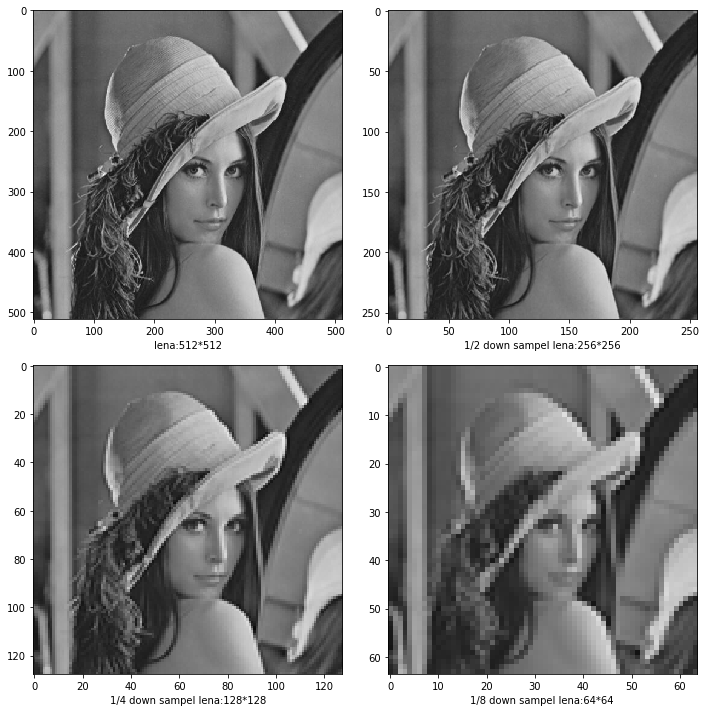

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(lena, 'gray'),plt.xlabel('lena:512*512')
plt.subplot(222), plt.imshow(lena_2, 'gray'),plt.xlabel('1/2 down sampel lena:256*256')
plt.subplot(223), plt.imshow(lena_4, 'gray'),plt.xlabel('1/4 down sampel lena:128*128')
plt.subplot(224), plt.imshow(lena_8, 'gray'),plt.xlabel('1/8 down sampel lena:64*64')
plt.tight_layout()
plt.show()

### 1.2 灰度分辨率下采样

In [5]:
def hd_ds(im,level):
    im=np.array(im)
    w,h=im.shape[:2]
    img=np.zeros([w,h])
    for i in range(w):
        for j in range(h):
            p=im[i,j]
            c=256/level
            d=256/(level-1) #对256个灰度级分level个平均对应的灰度值，[0，d,2d,...,(level-1)d](接近255结束)
            img[i,j]=(p//c)*d   
    return img

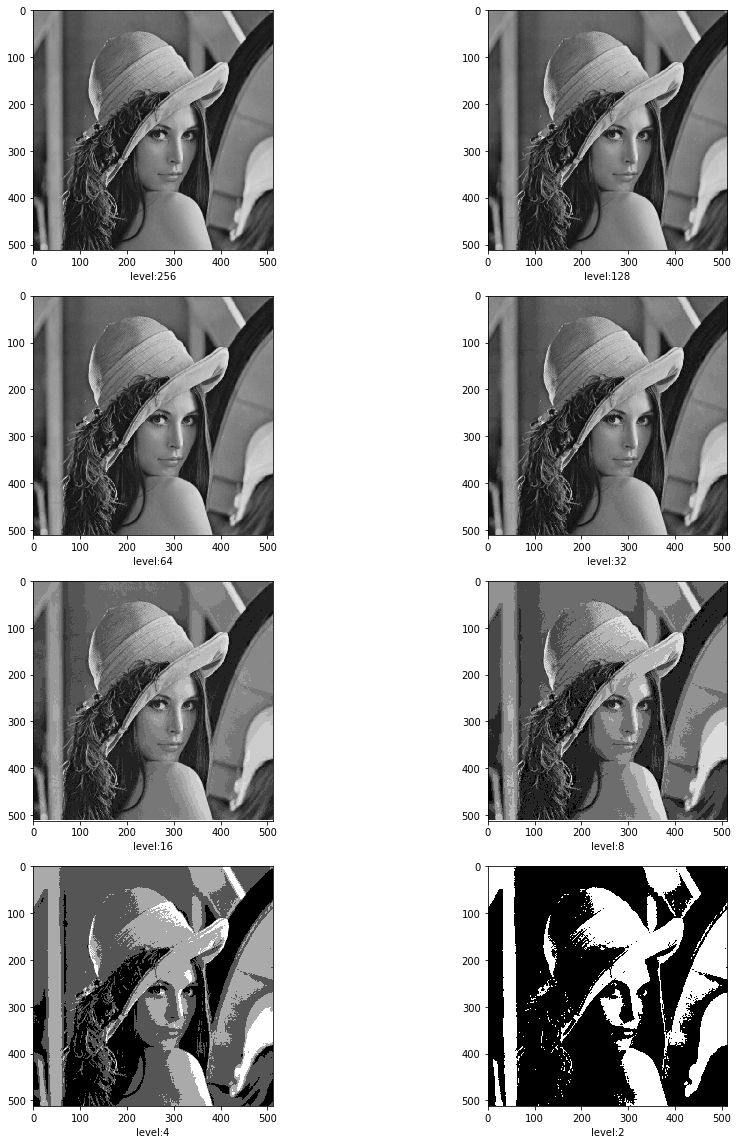

In [6]:
fig = plt.figure(figsize=(15, 16))
for i in range(8):
    ax = fig.add_subplot(4, 2, 8-i)
    level=pow(2,i+1)
    lena_hd=hd_ds(lena,level)
    ax.imshow(lena_hd, 'gray'),plt.xlabel('level:'+str(level))
plt.tight_layout()
plt.show()